In [1]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

In [8]:
n_pnts = 500
X, y  = datasets.make_circles(n_samples = n_pnts, random_state = 123, noise = 0.1, factor = 0.2)

In [6]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

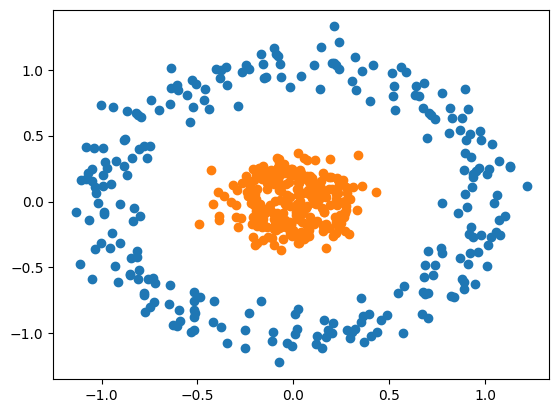

In [7]:
scatter_plot()

In [16]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [24]:
class Model(nn.Module):
  def __init__(self, n_inputs, H1, n_outputs):
    super().__init__()
    self.linear1 = nn.Linear(n_inputs,H1)
    self.linear2 = nn.Linear(H1,n_outputs)
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred > 0.5:
      return 1
    else:
      return 0

In [25]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [26]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [27]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch: ", i, loss.item())
  optimizer.zero_grad()
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

epoch:  0 0.7148520350456238
epoch:  1 0.6947316527366638
epoch:  2 0.6955162286758423
epoch:  3 0.7014890909194946
epoch:  4 0.7013982534408569
epoch:  5 0.697470486164093
epoch:  6 0.693925678730011
epoch:  7 0.6928598284721375
epoch:  8 0.6939383149147034
epoch:  9 0.6954388618469238
epoch:  10 0.6958757042884827
epoch:  11 0.6949177384376526
epoch:  12 0.6931492686271667
epoch:  13 0.691389799118042
epoch:  14 0.6901613473892212
epoch:  15 0.6894590258598328
epoch:  16 0.688843309879303
epoch:  17 0.687766969203949
epoch:  18 0.6859007477760315
epoch:  19 0.6832481622695923
epoch:  20 0.6800420880317688
epoch:  21 0.6765591502189636
epoch:  22 0.6729681491851807
epoch:  23 0.6692697405815125
epoch:  24 0.6653286218643188
epoch:  25 0.6609662771224976
epoch:  26 0.6560585498809814
epoch:  27 0.6505835056304932
epoch:  28 0.6446025967597961
epoch:  29 0.63819819688797
epoch:  30 0.6314071416854858
epoch:  31 0.6241893172264099
epoch:  32 0.6164446473121643
epoch:  33 0.60806262493133

Text(0.5, 0, 'Epoch')

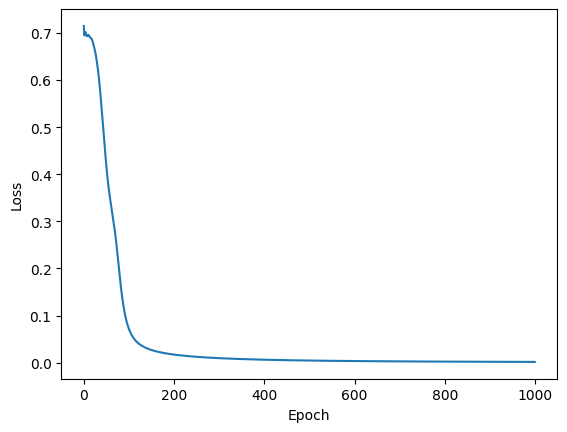

In [28]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [41]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
  y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
  xx, yy = np.meshgrid(x_span,y_span)
  grid = torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx,yy,z)

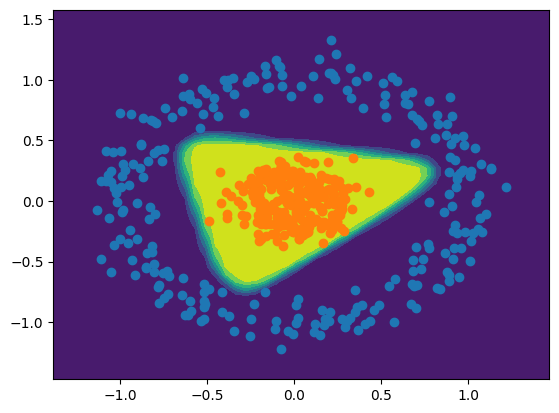

In [42]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is :  0


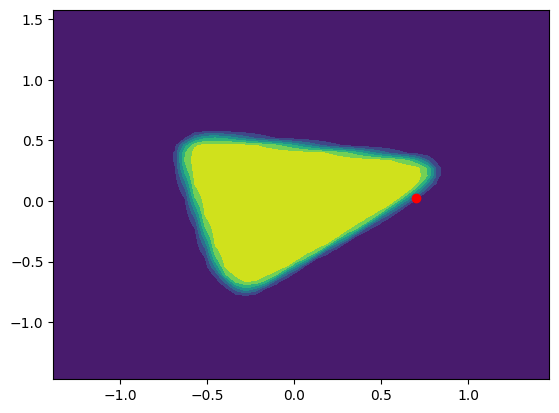

In [46]:
x = 0.7
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y],marker = 'o',color = "red")
print("Prediction is : ", prediction)
plot_decision_boundary(X,y)